# MUN 87/2-1-1

In [1]:
%matplotlib inline
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import sqlite3

con = sqlite3.connect("../data/CongoDB.sqlite")

## Verteilung der Funde

In [2]:
sql = """SELECT
           t_Ort.ort_kurz,
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Anzahl,
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/2-1-1'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,bef_nr,Komplex,Individuum,Typ,Anzahl,Gewicht,Gr_Clist,Art,Tiefe
0,MUN,87/2-1-1,87/2-1-1,"-2:2 -4:3,10-11,13",PKM,1,419,200,K,50.0
1,MUN,87/2-1-1,87/2-1-1,-4:2,PKM,1,691,500,K,70.0
2,MUN,87/2-1-1,87/2-1-1,"-4:5-6,8,12,14-21 -5:3",PKM,1,623,500,K,70.0
3,MUN,87/2-1-1,87/2-1-1,"-4:4,7,9 -5:4-6,8-9",PKM,1,344,200,K,70.0
4,MUN,87/2-1-1,87/2-1-1,-5:2,PKM,1,1671,500,K,80.0


In [4]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)

In [5]:
df_pivot1.plot(kind='pie', autopct='%.0f %%', cmap = 'Greys', figsize=(5, 5))
plt.ylabel('')
plt.savefig('../output/figs/9-13_MUN87-211_VerteilungFunde_A.pdf', bbox_inches='tight')

In [6]:
df_pivot2 = df.pivot_table(values = 'Gewicht', index = 'Tiefe', columns = 'Art', aggfunc = sum, fill_value = 0)
#df_pivot2.rename(columns={'K': 'Keramik'}, inplace=True)
#df_pivot2.rename(columns={'HL': 'Hüttenlehm'}, inplace=True)
df_pivot2

Art,Eisen,HL,K,Metall,Ofenwand,Schlacke,Sonder,Tuyere
Tiefe,,,,,,,,
0.0,0,5,3,0,0,0,0,0
40.0,0,513,146,0,271,851,0,18
50.0,34,593,684,0,390,300,65,31
60.0,0,281,56,0,0,1174,0,36
70.0,0,43,1675,0,3349,1669,0,65
80.0,0,58,1671,0,1009,449,0,0
100.0,0,424,0,0,0,409,0,67
106.0,0,12,168,5,4428,2160,0,0
187.0,0,0,2648,0,2892,7,0,0


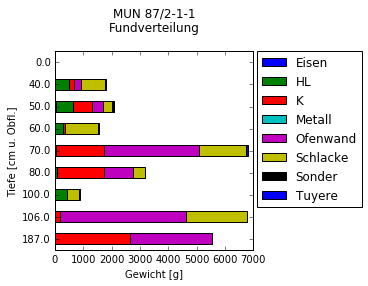

In [7]:
ax = df_pivot2.plot(kind = 'barh', stacked=True)
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.title('MUN 87/2-1-1\nFundverteilung\n')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.savefig('../output/figs/9-13_MUN87-211_VerteilungFunde_B.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [8]:
# Diagramm auf 100% - Prozentwerte für jede Zeile ausrechnen:
df_perc = df_pivot2.divide(df_pivot2.sum(axis=1), axis=0)
# df_perc

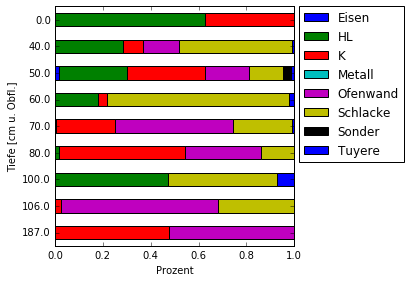

In [9]:
ax = df_perc.plot(kind = 'barh', stacked=True)
plt.xlabel('Prozent')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.legend(loc = 4)
plt.xlim([0, 1])
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + 1) / (abs(ylim[0]) + abs(ylim[1])))
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
plt.tight_layout()
plt.show()

In [10]:
df_pivot1 = df.pivot_table(values = 'Gewicht', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot1 = pd.DataFrame(df_pivot1)
# df_pivot1 = df_pivot1.reset_index()
df_pivot1.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot1['\%'] = (df_pivot1['Gewicht']/df_pivot1['Gewicht'].sum()*100).round(1)
df_pivot1['Gewicht'] = (df_pivot1['Gewicht'] / 1000).round(2)
df_pivot1.rename(columns={'Gewicht': 'Gewicht (kg)'}, inplace=True)

df_pivot2 = df.pivot_table(values = 'Anzahl', index = 'Art', aggfunc = sum, fill_value = 0)
df_pivot2 = pd.DataFrame(df_pivot2)
df_pivot2.rename(index={'HL': 'gebrannter Lehm', 'K': 'Keramik'}, inplace=True)
df_pivot2['\%'] = (df_pivot2['Anzahl']/df_pivot2['Anzahl'].sum()*100).round(1)

# Tabellen vereinen:
df_concat = pd.concat([df_pivot2, df_pivot1], axis = 1)
df_concat = df_concat.reset_index()
df_concat.rename(columns={'Art': 'Fundkategorie'}, inplace=True)
df_concat.to_latex('../output/tabs/9-16_MUN87-2-1-1_Funde.tex', index = False, escape = False)
df_concat

,Fundkategorie,Anzahl,\%,Gewicht (kg),\%
0,Eisen,1,0.1,0.03,0.1
1,gebrannter Lehm,88,13.1,2.04,5.8
2,Keramik,79,11.7,7.05,20.0
3,Metall,1,0.1,0.00,0.0
4,Ofenwand,0,0.0,18.24,51.8
5,Schlacke,489,72.7,7.58,21.5
6,Sonder,1,0.1,0.06,0.2
7,Tuyere,14,2.1,0.22,0.6


## Fragmentierung der Keramik

In [7]:
sql = """SELECT
           t_Obj.objID, 
           t_Komplex.bef_nr, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe 
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/2-1-1')
           AND ((t_Obj.Art) = "K"))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

,objID,bef_nr,Gewicht,Gr_Clist,Art,Tiefe
0,333,87/2-1-1,419,200,K,50
1,337,87/2-1-1,691,500,K,70
2,341,87/2-1-1,623,500,K,70
3,342,87/2-1-1,344,200,K,70
4,345,87/2-1-1,1671,500,K,80


## Gefäße

In [4]:
sql = """SELECT
           t_Obj.objID,
           t_Ort.ort_kurz,
           t_Komplex.bef_nr, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.GefEinheit AS GE, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Art,
           t_Obj.Tiefe,
           t_Obj.Form_Gef
       FROM (t_Ort INNER JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
       WHERE (((t_Ort.ort_kurz) = 'MUN')
           AND ((t_Komplex.bef_nr) = '87/2-1-1')
           AND ((t_Obj.Form_Gef) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
#display(df.head())
df

,objID,ort_kurz,bef_nr,Komplex,Individuum,Typ,GE,Gewicht,Gr_Clist,Art,Tiefe,Form_Gef
0,333,MUN,87/2-1-1,87/2-1-1,"-2:2 -4:3,10-11,13",PIKMUN,7,419,200,K,50,G1a
1,337,MUN,87/2-1-1,87/2-1-1,-4:2,PIKMUN,3,691,500,K,70,G1a
2,341,MUN,87/2-1-1,87/2-1-1,"-4:5-6,8,12,14-21 -5:3",PIKMUN,8,623,500,K,70,G1b
3,342,MUN,87/2-1-1,87/2-1-1,"-4:4,7,9 -5:4-6,8-9",PIKMUN,9,344,200,K,70,G1b
4,345,MUN,87/2-1-1,87/2-1-1,-5:2,PIKMUN,2,1671,500,K,80,G1a
5,346,MUN,87/2-1-1,87/2-1-1,-7:1-2,PIKMUN,6,168,200,K,106,G1b
6,347,MUN,87/2-1-1,87/2-1-1,-8:1,PIKMUN,4,829,500,K,187,G1b
7,348,MUN,87/2-1-1,87/2-1-1,"-8:2, 21, 53",PIKMUN,1,663,200,K,187,G1b
8,349,MUN,87/2-1-1,87/2-1-1,-8:3,PIKMUN,5,376,200,K,187,G1b
9,3167,MUN,87/2-1-1,87/2-1-1,-1:2,PIKMUN,10,81,120,K,40,G1a


In [3]:
df.pivot_table(values = 'GE', index = 'Tiefe', columns = 'Form_Gef', aggfunc = len, fill_value = 0, margins = True)

Form_Gef,G1a,G1b,G1b (?),G8a,G8a (?),All
Tiefe,,,,,,
40,1,0,0,0,0,1
50,2,0,0,0,0,2
70,1,2,0,0,0,3
80,1,0,0,0,0,1
106,0,1,0,0,0,1
187,0,3,1,1,2,7
All,5,6,1,1,2,15


## Verzierungselemente

In [3]:
sql = """SELECT
            t_Ort.ort_kurz,
            t_Komplex.bef_nr,
            t_Obj.objID,
            t_Obj.Komplex,
            t_Obj.Individuum,
            t_K_Verz.verzName,
            t_Obj.Tiefe,
            [t_K_Pos].[posReihe] || ' ' || [posName] AS pos
        FROM t_Komplex INNER JOIN t_Obj ON t_Komplex.komplexID = t_Obj.komplexID
            INNER JOIN t_Ort ON t_Ort.ortID = t_Komplex.ortID
            INNER JOIN "t_ObjPosVerz" ON t_Obj.objID = "t_ObjPosVerz".objID
            INNER JOIN t_K_Pos ON t_K_Pos.posID = "t_ObjPosVerz".posID
            INNER JOIN t_K_Verz ON t_K_Verz.verzID = "t_ObjPosVerz".verzID
        WHERE (((t_Ort.ort_kurz) = 'MUN')
            AND ((t_Komplex.bef_nr) = '87/2-1-1')
            AND ((t_Obj.Art) = "K")
            AND ((t_K_Verz.verzName_alt) Like 'V%')
            AND ((t_K_Pos.posID)<>1))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
display(df.head())

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,ort_kurz,bef_nr,objID,Komplex,Individuum,verzName,Tiefe,pos
0,MUN,87/2-1-1,333,87/2-1-1,"-2:2 -4:3,10-11,13",02.1,50,2 Rand
1,MUN,87/2-1-1,333,87/2-1-1,"-2:2 -4:3,10-11,13",02.1,50,5 Bauch
2,MUN,87/2-1-1,333,87/2-1-1,"-2:2 -4:3,10-11,13",02.3,50,5 Bauch
3,MUN,87/2-1-1,333,87/2-1-1,"-2:2 -4:3,10-11,13",04.2,50,5 Bauch
4,MUN,87/2-1-1,333,87/2-1-1,"-2:2 -4:3,10-11,13",01.1,50,5 Bauch


In [4]:
df_pivot = df.pivot_table(values = 'objID', index = 'pos', columns = 'verzName', fill_value = 0, aggfunc = len)
df_pivot

verzName,01.1,01.3,01.6,01.8,02.1,02.2,02.3,02.4,02.5,02.6,04.15,04.2
pos,,,,,,,,,,,,
1 Innen,0,0,0,0,3,0,0,0,0,0,1,0
2 Rand,2,0,0,0,17,0,0,0,0,0,1,0
5 Bauch,7,1,1,1,14,5,3,3,2,1,1,3


In [5]:
df_pivot = df_pivot.sort_index(ascending=True)

In [6]:
# stellt die Grundeinstellung für Plots von Matplotlib wieder her – sieht bei Nutzung pysurvey besser aus
#plt.rcdefaults()
#%matplotlib inline

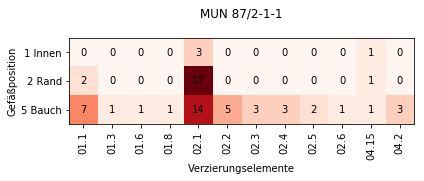

In [7]:
plt.imshow(df_pivot, interpolation='nearest', cmap='Reds')
plt.title('MUN 87/2-1-1\n')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_pivot.index)), df_pivot.index)
plt.xticks(range(len(df_pivot.columns)), df_pivot.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_pivot):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.show()

In [8]:
# Gruben-Abschnitte anhand der Tiefen beschreiben
df.loc[df['Tiefe'] <160, 'Teil'] = 'A'
df.loc[df['Tiefe'] >160, 'Teil'] = 'C'
# Pivottaballe erstellen
df_pivot = df.pivot_table(values = 'objID', index = ['Teil', 'pos'], columns = 'verzName', aggfunc = len, fill_value = 0)
# df_pivot = df_pivot.sort_index(ascending=True)
df_pivot = df_pivot.reset_index()
# Matrix nach Teilen 'zerschneiden'
df_A = df_pivot[df_pivot['Teil'] == 'A']
df_C = df_pivot[df_pivot['Teil'] == 'C']
# Spalte Teil ausschneiden -- verursacht fiese Fehlermeldung!
df_A.drop(['Teil'],inplace=True,axis=1)
df_C.drop(['Teil'],inplace=True,axis=1)
# pos wieder als Index rein
df_A = df_A.set_index('pos')
df_C = df_C.set_index('pos')

C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dirk\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
plt.figure(1)
plt.subplot(211)
plt.imshow(df_A, interpolation='nearest', cmap='Greys', alpha = .5)
plt.title('MUN 87/2-1-1 (C) - T < 106\n')
plt.ylabel('Gefäßposition')
plt.yticks(range(len(df_A.index)), df_A.index)
plt.xticks(range(len(df_A.columns)), df_A.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_A):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.gca().xaxis.set_major_locator(plt.NullLocator())

plt.subplot(212)
plt.imshow(df_C, interpolation='nearest', cmap='Greys', alpha = .5)
plt.title('MUN 87/2-1-1 (A) - T > 106\n')
plt.ylabel('Gefäßposition')
plt.xlabel('Verzierungselemente')
plt.yticks(range(len(df_C.index)), df_C.index)
plt.xticks(range(len(df_C.columns)), df_C.columns, rotation='vertical')
for (i, j), z in np.ndenumerate(df_C):
    plt.text(j, i, '{:0.0f}'.format(z), ha='center', va='center')
plt.tight_layout()
plt.savefig('../output/figs/9-13_MUN87-211_Verzierungselmente.pdf', bbox_inches='tight')
plt.show()

> **MUN 87/2-1-1** Verzierungselemente

n

In [17]:
df['objID'].nunique()

25

## Schlacken

In [11]:
sql = """SELECT
           t_Obj.ort_kurz, 
           t_Obj.Komplex, 
           t_Obj.Individuum, 
           t_Obj.Typ, 
           t_Obj.Gewicht,
           t_Obj.Gr_Clist, 
           t_Obj.Schlacke_Typ,
           t_Obj.Tiefe
       FROM t_Obj 
       WHERE (((t_Obj.ort_kurz) = 'MUN')
           AND ((t_Obj.Komplex) Like '%87/2-1-1%')
           AND (t_Obj.Art) Like '%S%'
           AND ((t_Obj.Schlacke_Typ) != ''))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df['Gewicht'] = df['Gewicht'].convert_objects(convert_numeric=True)
df['Tiefe'] = df['Tiefe'].convert_objects(convert_numeric=True)
df_pivot = df.pivot_table(values = 'Gewicht', index = ['Komplex', 'Tiefe'], columns = 'Schlacke_Typ', aggfunc = sum)
df_pivot

C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
C:\Users\DirkSeidenticker\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Schlacke_Typ       2a     2b      4a     4b    5      6
Komplex  Tiefe                                         
87/2-1-1 40     249.0  173.0   356.0   73.0  NaN    NaN
         50      57.0   69.0   174.0    NaN  NaN    NaN
         60      78.0  487.0   609.0    NaN  NaN    NaN
         70      88.0  186.0   559.0  203.0  NaN  477.0
         80      95.0  117.0   237.0    NaN  NaN    NaN
         100     47.0    NaN   362.0    NaN  NaN    NaN
         106    757.0  313.0  1090.0    NaN  NaN    NaN
         187      NaN    NaN     NaN    NaN  7.0    NaN

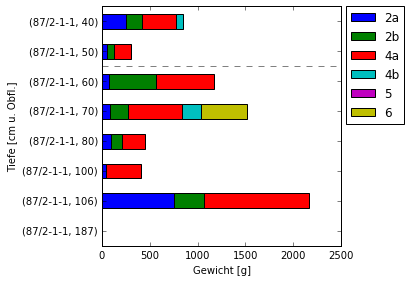

In [12]:
ax = df_pivot.plot(kind = 'barh', stacked=True)
plt.xlabel('Gewicht [g]')
plt.ylabel('Tiefe [cm u. Obfl.]')
plt.gca().invert_yaxis()
plt.axhline(1.5, color='grey', linestyle = '--')
lgd = plt.legend(bbox_to_anchor=(1.02, 1), loc = 2, borderaxespad = 0.)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1])))
plt.tight_layout()
#plt.savefig('../output/figs/9-16_MUN87-211_Schlacken.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [13]:
# nur grober Typ (alle Buchstaben raus):
df['Schlacke_Typ'] = df['Schlacke_Typ'].replace(regex = True, to_replace = r'\D', value = r'')
df_pivot = df.pivot_table(values = 'Gewicht', index = 'Schlacke_Typ', aggfunc = sum)
df_pivot = pd.DataFrame(df_pivot)
perc_of_columns = df_pivot.apply(lambda x : x / x.sum() * 100, axis=0) 
perc_of_columns

,Gewicht
Schlacke_Typ,
2,39.574530
4,53.373160
5,0.101996
6,6.950313


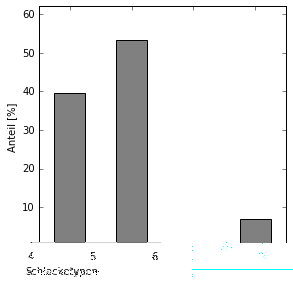

In [14]:
ax = perc_of_columns.plot(kind = 'bar', stacked=True, legend = None, color = 'grey')
plt.ylabel('Anteil [%]')
plt.xlabel('Schlacketypen')
plt.xticks(rotation=0)
plt.ylim(0,62)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
plt.gca().set_aspect((abs(xlim[0]) + abs(xlim[1])) / (abs(ylim[0]) + abs(ylim[1] + 2)))
plt.tight_layout()
#plt.savefig('../output/figs/9-16_MUN87-211_Schlacken_C.pdf', bbox_inches='tight')
plt.show()

## 14C Datierungen

In [13]:
sql = """SELECT
           t_14C.LABNR,
           t_14C.C14AGE,
           t_14C.C14STD,
           t_14C.C13,
           t_14C.MATERIAL,
           t_14C.SPECIES,
           [t_Ort].[ort_name] AS SITE, 
           [t_Komplex].[bef_art] AS CULTURE, 
           [t_Ort].[ort_kurz] || ' ' || [t_Komplex].[bef_nr] AS PHASE,
           [t_ort].[ort_land] AS COUNTRY,
           [t_ort].[y_lat] AS LATITUDE,
           [t_ort].[x_long] AS LONGITUDE
       FROM (t_Ort LEFT JOIN t_Komplex ON t_Ort.ortID = t_Komplex.ortID)
           LEFT JOIN t_14c ON t_Komplex.komplexID = t_14c.komplexID
       WHERE (((t_Ort.ort_name) = 'Munda')
           AND ((t_Komplex.bef_nr) = '87/2-1-1'))""".replace('\n',' ')

df = pd.read_sql(sql, con)
df.to_excel("../output/data/9-16_MUN87-2-1-1_14C.xls", index = False)
df

,LABNR,C14AGE,C14STD,C13,MATERIAL,SPECIES,SITE,CULTURE,PHASE,COUNTRY,LATITUDE,LONGITUDE
0,KI-2881,1990,45,-25.1,Bo 1/Palmkern,A,Munda,Grube/Ofen,MUN 87/2-1-1,COG,1.162608,17.356948
1,KI-2885,1800,90,-27.3,HK 6,C,Munda,Grube/Ofen,MUN 87/2-1-1,COG,1.162608,17.356948
2,KI-2886,1910,80,-26.1,HK 8,A,Munda,Grube/Ofen,MUN 87/2-1-1,COG,1.162608,17.356948
3,KI-2887,2020,180,-28.3,HK 9,C,Munda,Grube/Ofen,MUN 87/2-1-1,COG,1.162608,17.356948


In [16]:
print('''Plot()
{''')
for index, row in df.iterrows():
    print('R_Date("', row['LABNR'],'",', row['C14AGE'],',', row['C14STD'],');')
print('};')

Plot()
{
R_Date(" KI-2881 ", 1990 , 45 );
R_Date(" KI-2885 ", 1800 , 90 );
R_Date(" KI-2886 ", 1910 , 80 );
R_Date(" KI-2887 ", 2020 , 180 );
};
